In [ ]:
#%pdb

## First we read the image using matplotlib library

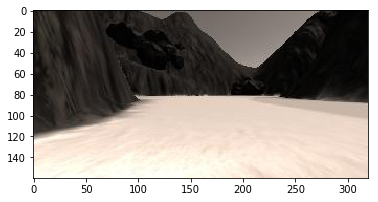

In [94]:
# Import some packages from matplotlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Define the filename, read and plot the image
filename = 'img2017-03-26-20-25-10-378.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

## Then we play around with the image

In [38]:
image

array([[[ 45,  40,  36],
        [ 35,  30,  26],
        [ 27,  22,  18],
        ..., 
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 41,  36,  32],
        [ 36,  31,  27],
        [ 28,  23,  19],
        ..., 
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 35,  30,  26],
        [ 36,  31,  27],
        [ 31,  26,  22],
        ..., 
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ..., 
       [[253, 255, 244],
        [253, 255, 244],
        [253, 255, 244],
        ..., 
        [245, 223, 209],
        [244, 222, 208],
        [243, 221, 207]],

       [[252, 255, 246],
        [252, 255, 246],
        [252, 255, 246],
        ..., 
        [244, 222, 208],
        [243, 221, 207],
        [243, 221, 207]],

       [[252, 255, 246],
        [252, 255, 246],
        [252, 255, 246],
        ..., 
        [242, 220, 206],
        [242, 220, 206],
        [242, 220,

### Here we obtain the shape and size of the image in pixels

In [39]:
image.shape

(160, 320, 3)

In [40]:
image.size

153600

In [71]:
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


## Now we cut a shape by filtering all the values in the array inside the shape of a circle with center in position (columns/2, 40), and applying a RGB colour combination for these values.

In [95]:
#First we create a copy of the original image for testing this case
new_image = image.copy()
nrows, ncols, ndepth = new_image.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row-40)**2 + (col-cnt_col)**2 < (80)**2)
new_image[outer_disk_mask] = [127,255,0]

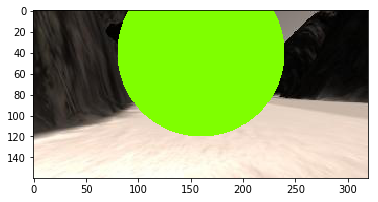

In [96]:
plt.imshow(new_image)
plt.show()

## Now we filter the image's colours

In [129]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels

#Extra personal channels:
yellow_channel = np.copy(image)
yellow_channel[:,:,[2]] = 0

### Once we have filtered all of the colours from the image we print them

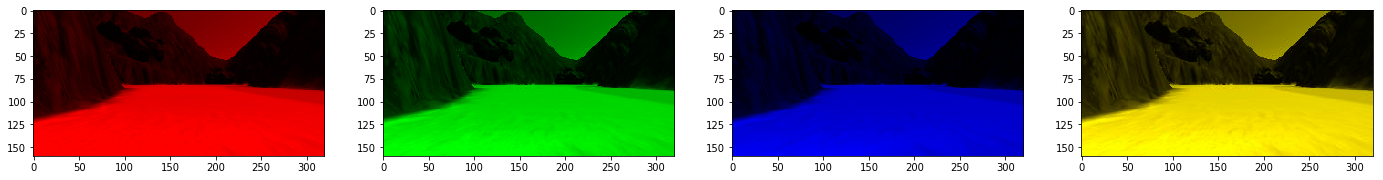

In [139]:
fig = plt.figure(figsize=(24,4)) # Create a figure for plotting
plt.subplot(141) # Initialize subplot number 1 in a figure that is 4 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(142) # Initialize subplot number 2 in a figure that is 4 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(143) # Initialize subplot number 3 in a figure that is 4 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.subplot(144) # Initialize subplot number 3 in a figure that is 4 columns 1 row
plt.imshow(yellow_channel)  # Plot the yellow channel
plt.show()